<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Supervised_(Classification)_ML_Model_Training_and_Evulation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table Content**


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https:">Introduction</a></li>
        <li><a href="#downloading_data">Data Loading</a></li>
        <li><a href="#pre-processing">Dropping feature</a></li>
         <li><a href="#pre-processing">Convert target variable into binary Form</a></li>
        <li><a href="#setting_up_tree">Data Imbalanced problem </a></li>
        <li><a href="#modeling">Missing Values</a></li>
         <li><a href="#modeling">Inconsistent data/Irrelevant features</a></li>
        <li><a href="#prediction">Hot Encoding</a></li>
        <li><a href="#evaluation">Outlier Detection</a></li>
        <li><a href="#evaluation">Model Training and Evaluation
        <ul>
        <li><a href="#evaluation">Decision Trees</a></li>
        <li><a href="#evaluation">Random Forest</a></li>
        <li><a href="#evaluation">Support Vector Machine</a></li>
         <li><a href="#evaluation">Logistic Regression</a></li>
         <li><a href="#evaluation">KNN</a></li>
    </ul>
</div>
<br>
<hr>


# **1- Introduction** 

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

# **2- Data Loading**

## **2.1 Data Loading from Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd 
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Water Brone diesease/Malyria_2-21-2021.csv',encoding = 'latin')

In [7]:
Train_data

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,RESULT_TEXT
0,K0460000001363,34 Year(s),Male,Abbottabad,havelia,11/12/2020 10:46:53 A11P11,1000000000085007,Y,1000000000087207,Negative
1,K0460000001680,43 Year(s),Male,Abbottabad,Abbottabad,9/29/2018 9:26:21 A9P9,1000000000087207,Y,1000000000087207,Negative
2,K0460000001680,43 Year(s),Male,Abbottabad,Abbottabad,9/29/2018 9:26:07 A9P9,1000000000085007,Y,1000000000087207,Negative
3,K0460000000106,28 Year(s),Male,Abbottabad,Abbottabad,5/4/2017 9:48:37 A5P5,1000000000085007,Y,1000000000087207,Negative
4,K0460000000150,42 Year(s),Male,Abbottabad,Abbottabad,6/3/2017 11:59:38 A6P6,1000000000085007,Y,1000000000087207,Negative
...,...,...,...,...,...,...,...,...,...,...
22911,K0400002457330,13 Year(s),Male,Haripur,Haripur,2/10/2021 16:53:12 A2P2,1000000000085060,Y,1000000000087207,Negative
22912,K0400002459565,20 Year(s),Male,Abbottabad,Abbottabad,2/11/2021 11:49:58 A2P2,1000000000085007,Y,1000000000087207,Negative
22913,K0400002461645,21 Year(s),Male,Abbottabad,Abbottabad,2/13/2021 11:55:21 A2P2,1000000000087207,Y,1000000000087207,Negative
22914,K04ACE21027742,45 Year(s),Female,Abbottabad,Abbottabad,2/17/2021 11:09:47 A2P2,1000000000087207,Y,1000000000087207,Negative


# **3- Dropping feature**

Dropping feature usually isn’t recommended because you’re losing information. But if you’re sure that the column isn’t important, or simply has too many missing values, you can choose to drop them. For example, for this dataset, the host_name column was removed for ethical reasons, and id was removed because it was was unnecessary.
To drop features, use drop and set axis to 1 and inplace to true. Axis is 1 because we want to drop columns (0 means row), and inplace is True because you're transforming it directly on your dataset.

## **3.1 Drop Index Columns**

In [9]:
Train_data=Train_data.reset_index()
Train_data=Train_data.drop(columns=['index'])

## **3.2 Drop Multiple featurs**

In [10]:
New5=Train_data.drop(Train_data.columns[[0,1,3,4,5,6,7,10,17]], axis=1, inplace=True)

# **4-Convert target variable into binary Form**

In [11]:
Train_data['RESULT_TEXT'].replace({'Negative': 0, 'Positive': 1},inplace = True)

# **5- Data Imbalanced problem**


## **5.1 Check Imbalanced Problem in Data**

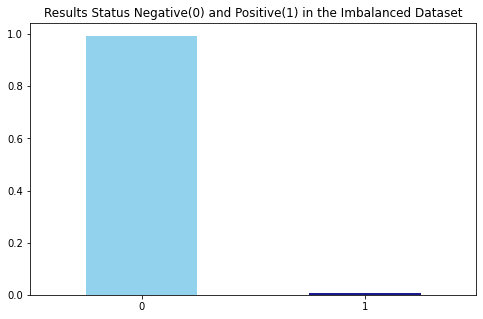

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
Train_data.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Results Status Negative(0) and Positive(1) in the Imbalanced Dataset')
plt.show()

## **5.2 Data resample**

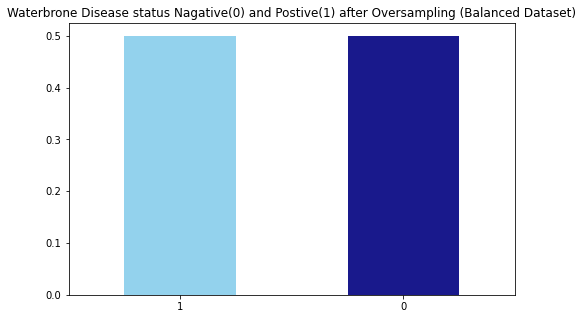

In [13]:
from sklearn.utils import resample
no = Train_data[Train_data.RESULT_TEXT == 0]
yes = Train_data[Train_data.RESULT_TEXT == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])
fig = plt.figure(figsize = (8,5))
oversampled.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Waterbrone Disease status Nagative(0) and Postive(1) after Oversampling (Balanced Dataset)')
plt.show()

#**6- Missing Values** 

## **6.2- Check missing Value**

In [14]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
REPORT_VERIFIED,796,0.01749
RESULT_TEXT,0,0.00000
CPT_ID.1,0,0.00000
RESULT_VALUE,0,0.00000


# **8-Hot Encoding**

In [ ]:
oversampled.select_dtypes(include=['object']).columns


In [16]:
# Impute categorical var with Mode
oversampled['MRNO'] = oversampled['MRNO'].fillna(oversampled['MRNO'].mode()[0])
oversampled['AGE'] = oversampled['AGE'].fillna(oversampled['AGE'].mode()[0])
oversampled['GENDER'] = oversampled['GENDER'].fillna(oversampled['GENDER'].mode()[0])
oversampled['DISTRICT'] = oversampled['DISTRICT'].fillna(oversampled['DISTRICT'].mode()[0])
oversampled['TEHSIL'] = oversampled['TEHSIL'].fillna(oversampled['TEHSIL'].mode()[0])
oversampled['REPORT_VERIFIED'] = oversampled['REPORT_VERIFIED'].fillna(oversampled['REPORT_VERIFIED'].mode()[0])
oversampled['RESULT_VALUE'] = oversampled['RESULT_VALUE'].fillna(oversampled['RESULT_VALUE'].mode()[0])

In [17]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [18]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

# **9-Outlier detection**

Outliers can be dangerous as they can skew your model and give you predictions that are biased and erroneous.
The best way to find outliers is to use the describe function and look at information such as maximum and mean.

In [ ]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [20]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(34554, 10)

In [21]:
MiceImputed

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,RESULT_TEXT
1,10373.0,41.0,1.0,0.0,1.0,21463.0,1.000000e+15,1.0,1.000000e+15,0.0
2,10373.0,41.0,1.0,0.0,1.0,21462.0,1.000000e+15,1.0,1.000000e+15,0.0
3,10312.0,23.0,1.0,0.0,1.0,10809.0,1.000000e+15,1.0,1.000000e+15,0.0
4,10313.0,40.0,1.0,0.0,1.0,12521.0,1.000000e+15,1.0,1.000000e+15,0.0
5,10315.0,26.0,0.0,0.0,1.0,2063.0,1.000000e+15,1.0,1.000000e+15,0.0
...,...,...,...,...,...,...,...,...,...,...
12343,3001.0,65.0,0.0,0.0,1.0,3669.0,1.000000e+15,1.0,1.000000e+15,1.0
15056,2531.0,29.0,0.0,0.0,1.0,19534.0,1.000000e+15,1.0,1.000000e+15,1.0
13513,7286.0,84.0,1.0,0.0,1.0,8439.0,1.000000e+15,1.0,1.000000e+15,1.0
8974,744.0,9.0,1.0,0.0,1.0,10606.0,1.000000e+15,1.0,1.000000e+15,1.0


# **10- Data spliting**

In [22]:
X=MiceImputed.drop('RESULT_TEXT',axis=1)

In [23]:
y=MiceImputed[['RESULT_TEXT']]


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# **11- Model Training and Evaluation**

## **11.1-Decision Trees**

### **Model Training**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(random_state=0, max_depth=2)
DTC= DTC.fit(X_train , y_train)
DTC

###**Model evaluation**

**Accuracy**

In [ ]:
y_pred_DT = DTC.predict(X_test)
DT_Acc=DTC.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(DTC.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred_DT)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [33]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred_DT)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.60      0.99      0.75      5871
         1.0       0.93      0.13      0.23      4496

    accuracy                           0.62     10367
   macro avg       0.76      0.56      0.49     10367
weighted avg       0.74      0.62      0.52     10367





**ROC CURVE**

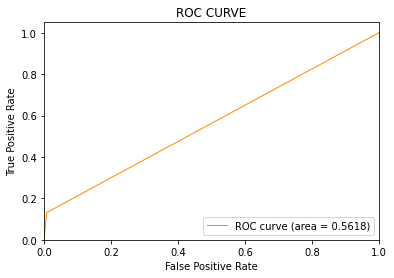

In [35]:
from sklearn.metrics import roc_curve, auc
fpr_DT, tpr_DT, thresholds = roc_curve(y_test, y_pred_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)
plt.figure()
plt.plot(fpr_DT, tpr_DT, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_DT)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##**11.2-Random Forest**

### **Model training**

In [37]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
RF= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=10)
RF_model= RF.fit(X_train , y_train)
RF_model

### **Model evaluation**

**Accuracy**

In [ ]:
y_pred_RF = RF_model.predict(X_test)
RF_Acc=RF_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(RF_model.score(X_test, y_test)))

**Confusion Matrix**

In [41]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR_RF=confusion_matrix(y_test, y_pred_RF)
print(CR_RF)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR_RF,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [44]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_RF=classification_report(y_test, y_pred_RF)
print(CR_RF)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84      5871
         1.0       0.87      0.63      0.73      4496

    accuracy                           0.80     10367
   macro avg       0.82      0.78      0.78     10367
weighted avg       0.81      0.80      0.79     10367





**ROC CURVE**

In [45]:
from sklearn.metrics import roc_curve, auc

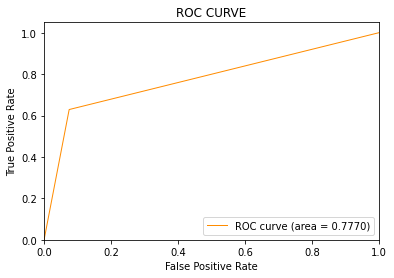

In [46]:
fpr_RF, tpr_RF, thresholds = roc_curve(y_test, y_pred_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)
plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_RF)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.3-SVM Support Vector Machine**

### **Model Training**

In [48]:
from sklearn.svm import LinearSVC

In [ ]:
svc=LinearSVC(random_state=0, tol=1e-5)
SVM_Model= svc.fit(X_train , y_train)
SVM_Model

### **Model Evaluation**

**Accuracy**

In [51]:
y_pred_SVM = SVM_Model.predict(X_test)
SVM_Acc=SVM_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(SVM_Model.score(X_test, y_test)))

Accuracy score= 0.4337


**Confusion Matrix**

In [52]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_SVM=confusion_matrix(y_test, y_pred_SVM)
print(CR_SVM)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_SVM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_SVM=classification_report(y_test, y_pred_SVM)
print(CR_SVM)
print('\n')

**ROC CURVE**

In [57]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_SVM, tpr_SVM, thresholds = roc_curve(y_test, y_pred_SVM)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
plt.figure()
plt.plot(fpr_SVM, tpr_SVM, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_SVM)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.4-Logistic Regression(LR)**

### **Model Training**

In [60]:
from sklearn.linear_model import LogisticRegression


In [62]:
LR= LogisticRegression()
LR_Model= LR.fit(X_train , y_train)
LR_Model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **Model Evaluation**

**Accuracy**

In [63]:
y_pred_LR = LR.predict(X_test)
LR_Acc=LR_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LR_Model.score(X_test, y_test)))

Accuracy score= 0.5663


**Confusion Matrix**

In [64]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_LR=confusion_matrix(y_test, y_pred_LR)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_LR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_LR=classification_report(y_test, y_pred_LR)
print(CR_LR)
print('\n')

**ROC CURVE**

In [68]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, y_pred_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)
plt.figure()
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_LR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **11.5 KNN Algorithm**

### **Model Training**

In [70]:
from sklearn.naive_bayes import GaussianNB
KNN=GaussianNB()
KNN_Model= KNN.fit(X_train , y_train)
KNN_Model

GaussianNB(priors=None, var_smoothing=1e-09)

### **Model Evaluation**

**Accuracy**

In [71]:
y_pred_KNN = KNN.predict(X_test)
KNN_Acc=KNN_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(KNN_Model.score(X_test, y_test)))

Accuracy score= 0.4337


**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_KNN=confusion_matrix(y_test, y_pred_KNN)
print(CM_KNN)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_KNN,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_KNN=classification_report(y_test, y_pred_KNN)
print(CM_KNN)
print('\n')

**ROC CURVE**

In [74]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_KNN, tpr_KNN, thresholds = roc_curve(y_test, y_pred_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
plt.figure()
plt.plot(fpr_KNN, tpr_KNN, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_KNN)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **12-Compare Modle performance**

## **12.1-ROC Curve for Models**

In [ ]:
plt.plot(fpr_DT, tpr_DT, marker='*', label='Decision Trees', color = 'black')
plt.plot(fpr_RF, tpr_RF, marker='*', label='Random Forest', color = 'Red')
plt.plot(fpr_SVM, tpr_SVM, marker='*', label='SVM', color = 'green')
plt.plot(fpr_LR, tpr_LR, marker='*', label='LogisticRegression', color = 'yellow')
plt.plot(fpr_KNN, tpr_KNN, marker='*', label='KNN', color = 'blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

## **12.2-Comparison of all algorithms Results**

In [80]:
from prettytable import PrettyTable

In [81]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(DT_Acc,4)])
x.add_row(["Random Forest Algorithm", round(RF_Acc,4)])
x.add_row(["Support Vector Machine Algorithm", round(SVM_Acc,4)])
x.add_row(["LogisticRegression Algorithm", round(LR_Acc,4)])
x.add_row(["KNN Algorithm", round(KNN_Acc,4)])
print(x)
print('\n')



Comparison of all algorithm results
+----------------------------------+----------+
|              Model               | Accuracy |
+----------------------------------+----------+
|     Decision Trees Algorithm     |  0.6189  |
|     Random Forest Algorithm      |  0.7967  |
| Support Vector Machine Algorithm |  0.4337  |
|   LogisticRegression Algorithm   |  0.5663  |
|          KNN Algorithm           |  0.4337  |
+----------------------------------+----------+




# **References**

[Fill Missing Values in a Dataset using Python](https://thecleverprogrammer.com/2021/05/29/fill-missing-values-in-a-dataset-using-python/)

[Data Cleaning with Python](https://medium.com/bitgrit-data-science-publication/data-cleaning-with-python-f6bc3da64e45)